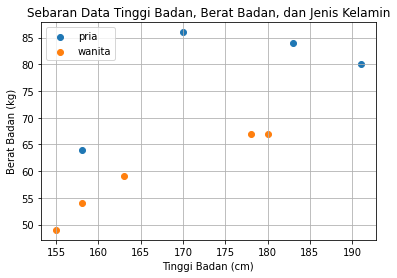

X_train:
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]

y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']
y_train: [[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]
y_train: [0 0 0 0 1 1 1 1 1]


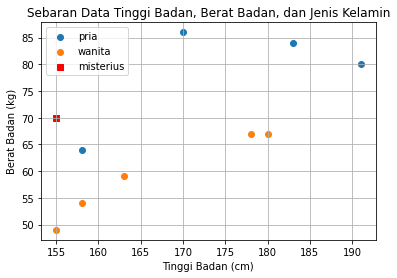

X_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:
[0 0 1 1]

Accuracy: 0.75
Precision: 0.6666666666666666
Recall: 1.0
F1 score: 0.8
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

MCC: 0.5773502691896258


In [2]:
#Classification dengan KNN 

#Sample Dataset
import pandas as pd

sensus = {
	'tinggi': [158, 170, 183, 191, 155, 163, 180, 158, 178],
	'berat': [64, 86, 84, 80, 49, 59, 67, 54, 67],
	'jk': [
	'pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', 'wanita', 
	]
}

sensus_df = pd.DataFrame(sensus)
sensus_df


#Visualisasi Data
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
	ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()


#Preprocessing Dataset
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'berat']])
y_train = np.array(sensus_df['jk'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')


from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train: {y_train}')


y_train = y_train.flatten()

print(f'y_train: {y_train}')


#Training KNN Classification Model
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)


#Prediksi Jenis Kelamin
tinggi_badan = 155
berat_badan = 70
X_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1)
X_new


y_new = model.predict(X_new)
y_new


lb.inverse_transform(y_new)



#Visualisasi Nearest Neighbours
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
	ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.scatter(tinggi_badan,
	berat_badan,
	marker='s',
	color='red',
	label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()


#Kalkulasi Distance (Euclidean Distance)
misterius = np.array([tinggi_badan, berat_badan])
misterius

X_train


from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])


#Evaluasi KNN Classification Model

#Testing Set
X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test = lb.transform(np.array(['pria', 'pria', 'wanita', 'wanita'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}\n')


#Prekdiksi terhadap testing set
y_pred = model.predict(X_test)
y_pred


#Accuracy
#accuracy is the proportion of test instance that were classified correctly

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')


#Precission
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precision: {prec}')


#Recall
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')


#F1 Score

from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1 score: {f1}')


#Classification Report
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report: {cls_report}')


#MCC = matthews correlation coefficient

from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')